In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')

/tmp/ipykernel_22297/1502387084.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')


In [3]:
print("Dataset Shape:", data.shape)
print("Dataset Columns:", data.columns)

Dataset Shape: (1000098, 52)
Dataset Columns: Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [17]:
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'], errors='coerce')

In [18]:
data.replace(['', ' ', 'NaN', 'nan'], np.nan, inplace=True)

In [19]:
missing_values = data.isnull().sum()
missing_values

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [20]:
# Drop Columns with High Missing Values
columns_to_drop = ['CustomValueEstimate', 'CrossBorder', 'NumberOfVehiclesInFleet', 
                   'WrittenOff', 'Rebuilt', 'Converted']
data_cleaned = data.drop(columns=columns_to_drop)

In [21]:
# For categorical columns, use mode
categorical_columns_to_impute = ['Bank', 'AccountType', 'MaritalStatus', 'Gender']
for col in categorical_columns_to_impute:
    data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)

/tmp/ipykernel_22297/3387964079.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)


In [24]:
data_cleaned['CapitalOutstanding'] = data_cleaned['CapitalOutstanding'].str.replace(',', '', regex=True)
data_cleaned['CapitalOutstanding'] = pd.to_numeric(data_cleaned['CapitalOutstanding'], errors='coerce')
data_cleaned['CapitalOutstanding'].fillna(data_cleaned['CapitalOutstanding'].median(), inplace=True)
print("Remaining missing values:", data_cleaned['CapitalOutstanding'].isnull().sum())

Remaining missing values: 0


/tmp/ipykernel_22297/3514211390.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['CapitalOutstanding'].fillna(data_cleaned['CapitalOutstanding'].median(), inplace=True)


In [25]:
data_cleaned.isnull().sum()

UnderwrittenCoverID              0
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
Citizenship                      0
LegalType                        0
Title                            0
Language                         0
Bank                             0
AccountType                      0
MaritalStatus                    0
Gender                           0
Country                          0
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
ItemType                         0
mmcode                         552
VehicleType                    552
RegistrationYear                 0
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate    

In [29]:
vehicle_columns = ['mmcode', 'VehicleType', 'make', 'Model', 'Cylinders', 
                   'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate']

for col in vehicle_columns:
    if data_cleaned[col].dtype == 'object':
        data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)
    else:
        data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

/tmp/ipykernel_22297/3543384692.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)
/tmp/ipykernel_22297/3543384692.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [30]:
data_cleaned['NewVehicle'].fillna('Unknown', inplace=True)

/tmp/ipykernel_22297/1151873388.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['NewVehicle'].fillna('Unknown', inplace=True)


In [31]:
print("Remaining missing values:\n", data_cleaned.isnull().sum())

Remaining missing values:
 UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle   

In [33]:
# Descriptive Statistics for numerical features
numerical_columns = ['TotalPremium', 'TotalClaims', 'CalculatedPremiumPerTerm']
summary_stats = data_cleaned[numerical_columns].describe()
summary_stats

,TotalPremium,TotalClaims,CalculatedPremiumPerTerm
count,1.000098e+06,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01,1.178757e+02
std,2.302845e+02,2.384075e+03,3.997017e+02
min,-7.825768e+02,-1.200241e+04,0.000000e+00
25%,0.000000e+00,0.000000e+00,3.224800e+00
50%,2.178333e+00,0.000000e+00,8.436900e+00
75%,2.192982e+01,0.000000e+00,9.000000e+01
max,6.528260e+04,3.930921e+05,7.442217e+04


In [34]:
data_types = data.dtypes
data_types

UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object
Model                               object
Cylinders  

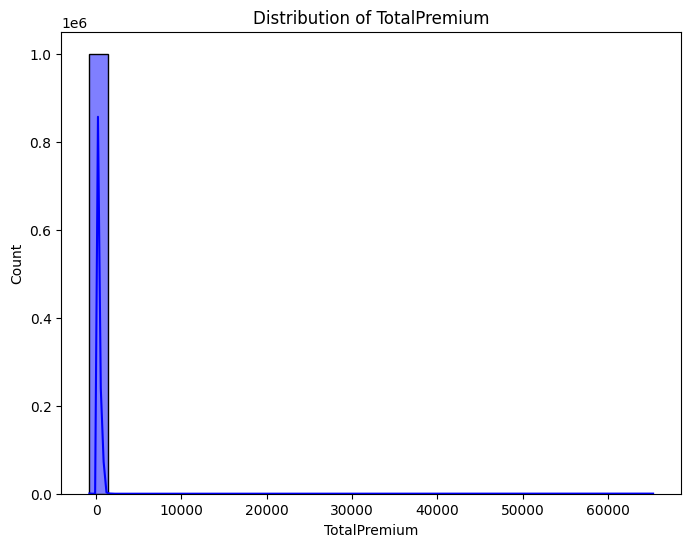

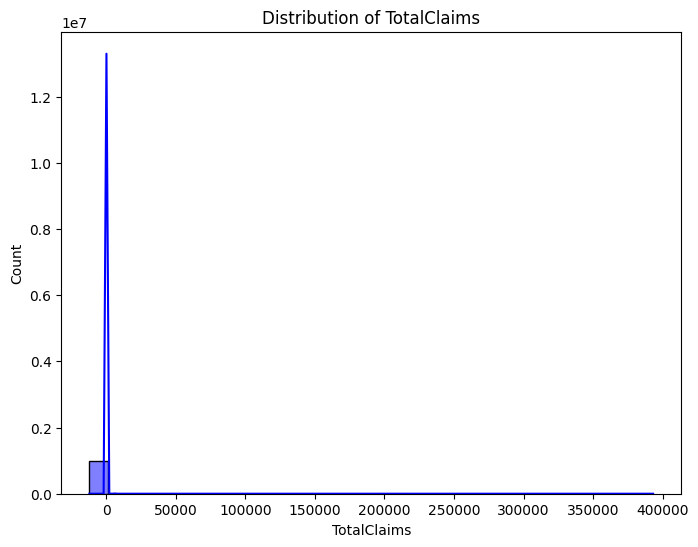

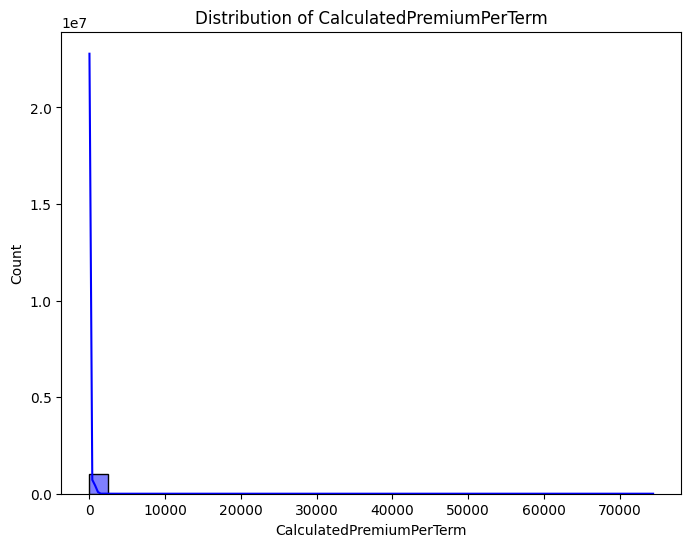

In [37]:
# Histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_cleaned[col].dropna(), kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

/tmp/ipykernel_22297/3143213521.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data_cleaned[col], order=data_cleaned[col].value_counts().index, palette='viridis')


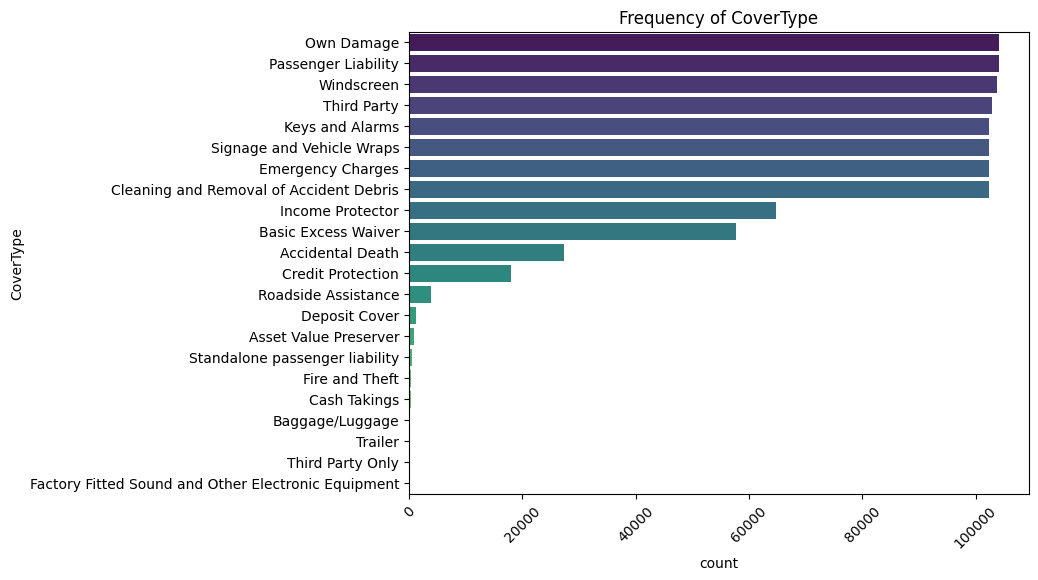

/tmp/ipykernel_22297/3143213521.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data_cleaned[col], order=data_cleaned[col].value_counts().index, palette='viridis')


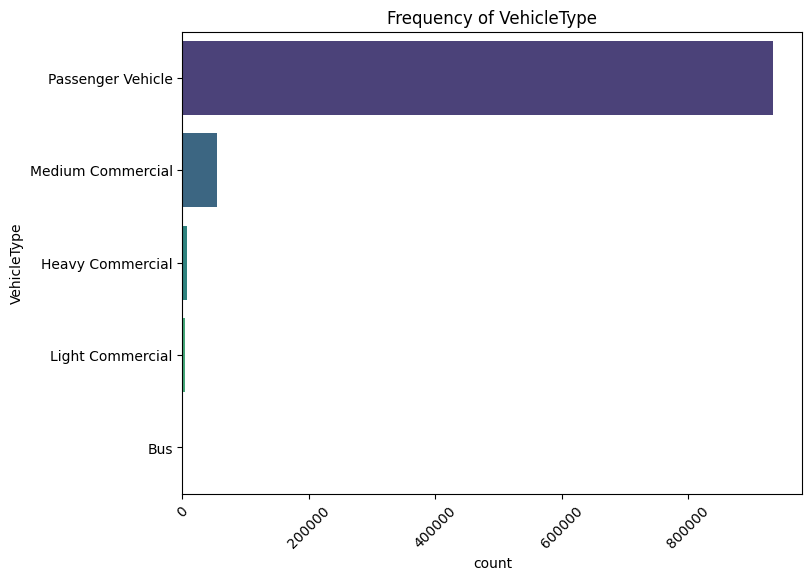

/tmp/ipykernel_22297/3143213521.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data_cleaned[col], order=data_cleaned[col].value_counts().index, palette='viridis')


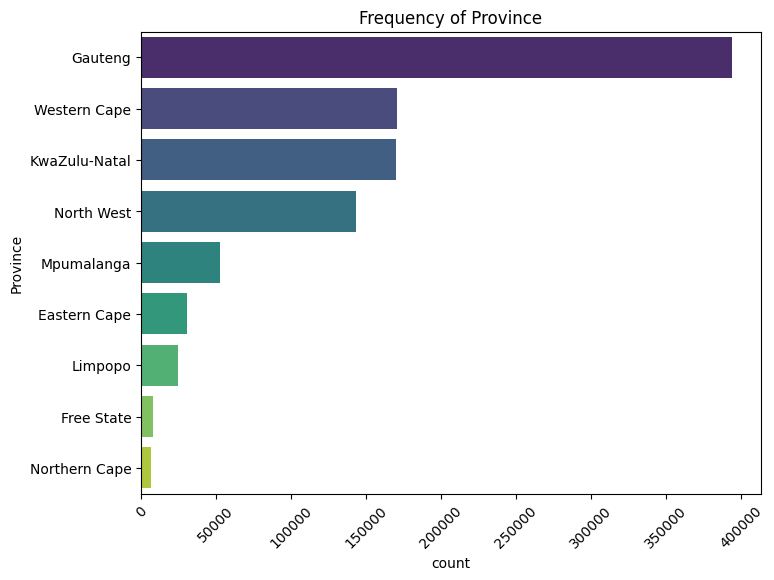

In [39]:
# Bar plots for categorical columns
categorical_columns = ['CoverType', 'VehicleType', 'Province']
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data_cleaned[col], order=data_cleaned[col].value_counts().index, palette='viridis')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()

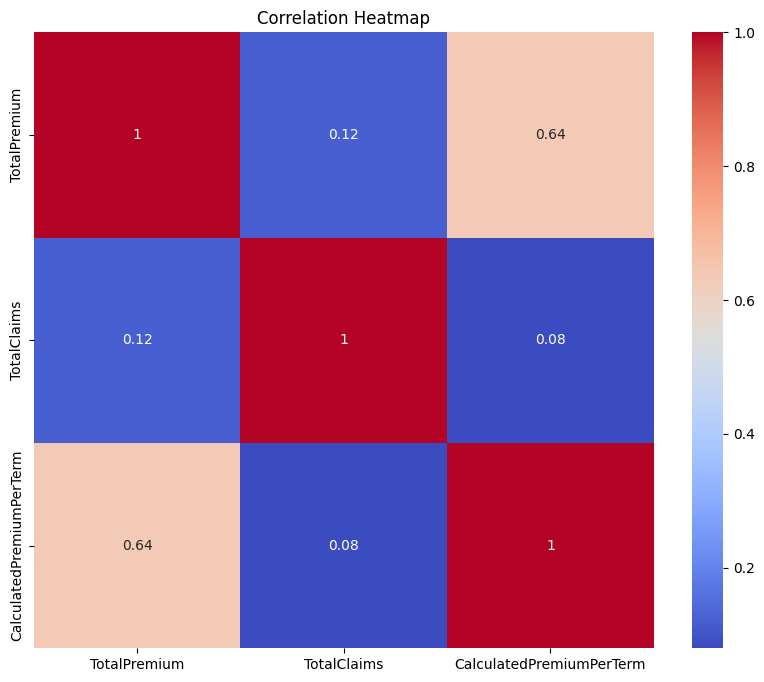

In [40]:
# Correlation heatmap
correlation_matrix = data_cleaned[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

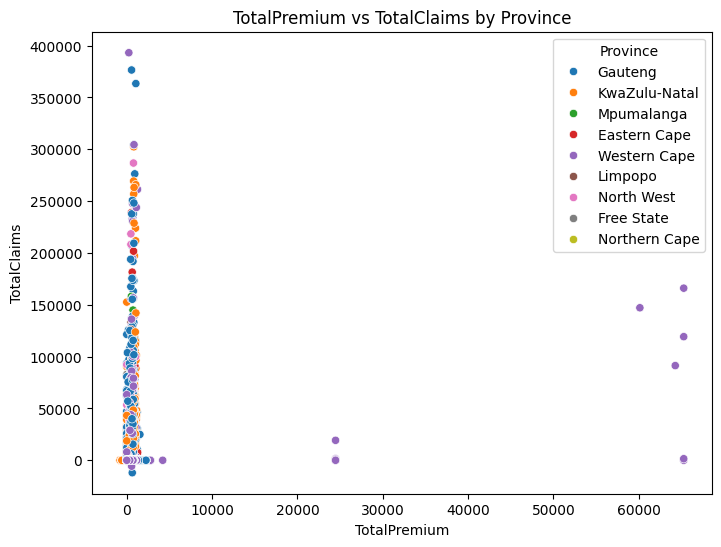

In [41]:
# Scatter plot between TotalPremium and TotalClaims
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='Province', data=data_cleaned, palette='tab10')
plt.title('TotalPremium vs TotalClaims by Province')
plt.show()

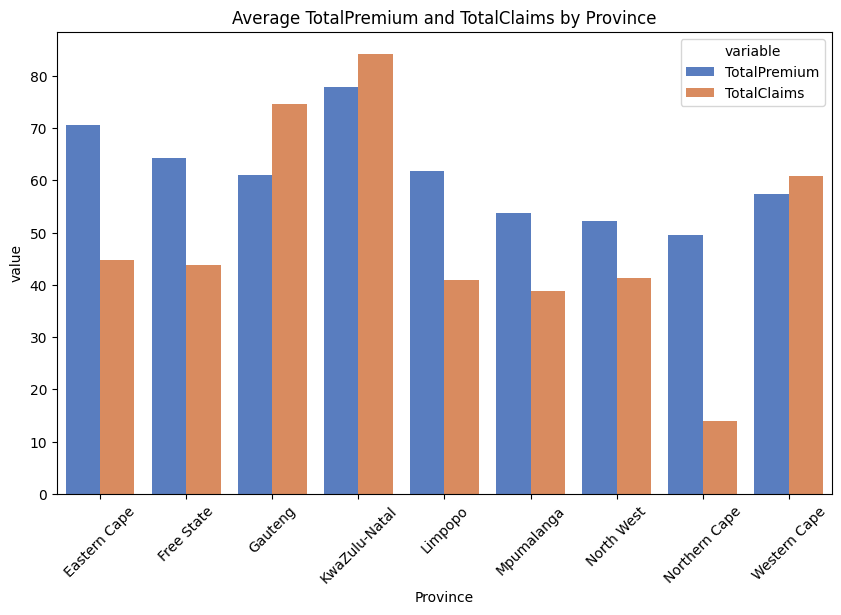

In [42]:
geo_data = data_cleaned.groupby('Province')[['TotalPremium', 'TotalClaims']].mean().reset_index()
geo_data = pd.melt(geo_data, id_vars='Province', value_vars=['TotalPremium', 'TotalClaims'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Province', y='value', hue='variable', data=geo_data, palette='muted')
plt.title('Average TotalPremium and TotalClaims by Province')
plt.xticks(rotation=45)
plt.show()